In [176]:
#Data manipulation
import numpy as np
import pandas as pd

#Viz
import matplotlib.pyplot as plt
import seaborn as sns

#ML
from sklearn import preprocessing

In [282]:
#Get the data
df = pd.read_csv(r'D:\Data\results.csv')

In [283]:
#Inspect

#First and last values
print("The first 5 and last 5 tuples of the dataset:")
display(df.head())
display(df.tail())

#Columns
print("\nThe {} columns of the dataset:" .format(len(df.columns)))
display(df.columns)

The first 5 and last 5 tuples of the dataset:


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41841,2020-11-18,Kosovo,Moldova,1,0,UEFA Nations League,Pristina,Kosovo,False
41842,2020-11-18,Greece,Slovenia,0,0,UEFA Nations League,Athens,Greece,False
41843,2020-11-18,Albania,Belarus,3,2,UEFA Nations League,Tirana,Albania,False
41844,2020-11-18,Kazakhstan,Lithuania,1,2,UEFA Nations League,Almaty,Kazakhstan,False
41845,2020-12-09,United States,El Salvador,6,0,Friendly,Fort Lauderdale,United States,False



The 9 columns of the dataset:


Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [48]:
#Describing the data by column
print("Description of the data:")
display(df.describe())

print("\n\n\n")
df.info()

Description of the data:


,home_score,away_score
count,41846.000000,41846.000000
mean,1.743703,1.186374
std,1.752224,1.403199
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41846 entries, 0 to 41845
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        41846 non-null  object
 1   home_team   41846 non-null  object
 2   away_team   41846 non-null  object
 3   home_score  41846 non-null  int64 
 4   away_score  41846 non-null  int64 
 5   tournament  41846 non-null  object
 6   city        41846 non-null  object
 7   country     41846 non-null  object
 8   neutral     41846 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [165]:
#Distribution of the teams playing
home_team_appearances = pd.DataFrame(df.home_team.value_counts())
away_team_appearances = pd.DataFrame(df.away_team.value_counts())

stadium_distribution = pd.concat([home_team_appearances, away_team_appearances], axis = 1)

##### Thoughts:

Six of the nine columns are nominal, two are numeric, and one is a data time structure. The numeric column is made of whole numbers. There are no non-null entries. All values are objects besides the home_team/away_team columns and the neutral colum, which are ints and bool respectively.

Goal distribution:


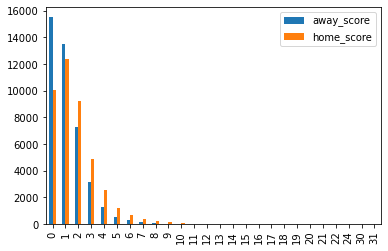

In [132]:
#Distribution of the scores
goal_distribution_home = pd.DataFrame(df.home_score.value_counts())
goal_distribution_away = pd.DataFrame(df.away_score.value_counts())

goal_distribution_home.sort_index(inplace = True)
goal_distribution_away.sort_index(inplace = True)

goal_distribution = pd.concat([goal_distribution_away, goal_distribution_home], axis = 1)

print("Goal distribution:")
display(goal_distribution.plot.bar())

##### Thoughts:
It's trivial that the home team tends to score more than the away team. The away team is far more likely to score 0 than the home team. Scoring 1 goal is fairly even but the dip begins to really show in 2 or more goals.

The distribution of the tournaments:


,tournament
Friendly,17127
FIFA World Cup qualification,7236
UEFA Euro qualification,2582
African Cup of Nations qualification,1672
FIFA World Cup,900
...,...
Dragon Cup,4
OSN Cup,4
AFF Championship qualification,2
Atlantic Heritage Cup,2


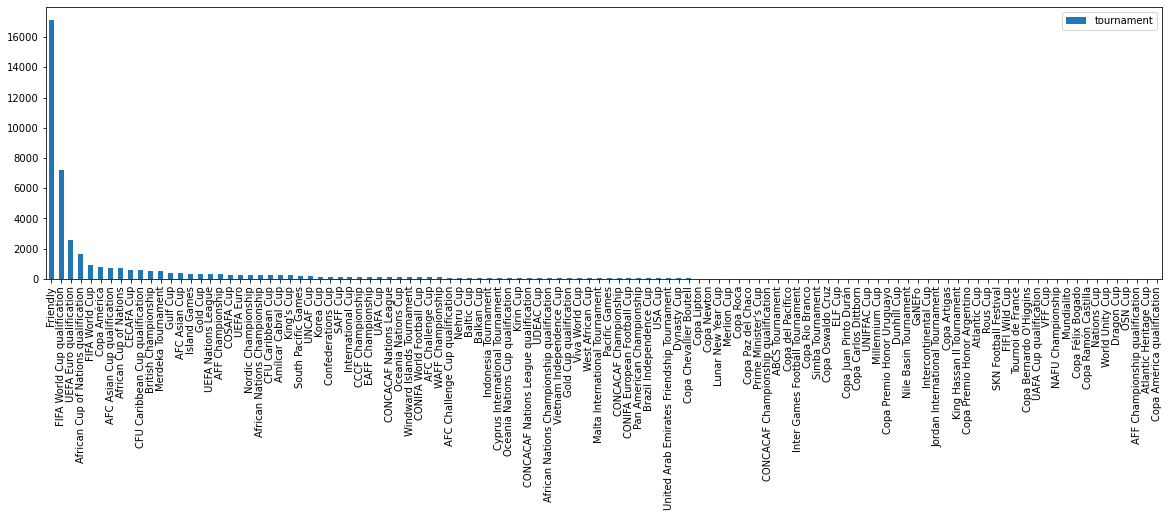

In [144]:
#Distribution of the game type
game_type = pd.DataFrame(df.tournament.value_counts())

print("The distribution of the tournaments:")
display(game_type)
display(game_type.plot.bar(figsize = (20, 5)))

##### Thougts:
The distribution is heavily skewed left. Friendly matches make up nearly 1/2 of the entire dataset. This may lead to some inaccurate results in the real world as friendly matches are often taken lightly by players, different lineups and strategies are experimented with and teams often give younger, backup players the change to play rather than playing their starters.

Branching off of this the remainder are cup games, with the Euro, World Cup, and African Cup being very important tournaments to the teams.

In [166]:
#Neutral distribution
df.neutral.value_counts()

False    31530
True     10316
Name: neutral, dtype: int64

###### Thoughts:
There are enough neutral location games to count in our study.

In [247]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41841,2020-11-18,Kosovo,Moldova,1,0,UEFA Nations League,Pristina,Kosovo,False
41842,2020-11-18,Greece,Slovenia,0,0,UEFA Nations League,Athens,Greece,False
41843,2020-11-18,Albania,Belarus,3,2,UEFA Nations League,Tirana,Albania,False
41844,2020-11-18,Kazakhstan,Lithuania,1,2,UEFA Nations League,Almaty,Kazakhstan,False


In [284]:
#Change nominal values to numeric
categorical_data = pd.DataFrame()

#Find the data that will be encoded
for i in df.columns:
    
    if df[i].dtype == 'object' and i != 'date':
        
        categorical_data[i] = df[i]
        
#Define the Encoder
le = preprocessing.LabelEncoder()

#Encode the data
categorical_data = categorical_data.stack(dropna = False).to_frame().apply(le.fit_transform)[0].unstack()

#Combine the new encoded data with the old set that was already in int form
for i in categorical_data.columns:
    
    df[i] = categorical_data[i]
        
#Change the bools to ints
df.neutral = df.neutral * 1